       station_id city_name        date  season  avg_temp_c  min_temp_c  \
0           11035    Vienna  1855-02-01  Winter         NaN        -8.5   
1           11035    Vienna  1855-02-02  Winter         NaN       -12.1   
2           11035    Vienna  1855-02-03  Winter         NaN       -17.5   
3           11035    Vienna  1855-02-04  Winter         NaN       -11.4   
4           11035    Vienna  1855-02-05  Winter         NaN        -7.5   
...           ...       ...         ...     ...         ...         ...   
193114      10384    Berlin  2023-08-30  Summer        15.6        11.9   
193115      10384    Berlin  2023-08-31  Summer        16.2        12.0   
193116      10384    Berlin  2023-09-01  Autumn        16.7        12.2   
193117      10384    Berlin  2023-09-02  Autumn        17.6        13.3   
193118      10384    Berlin  2023-09-03  Autumn        18.5        13.5   

        max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  ...  \
0             -4.0   

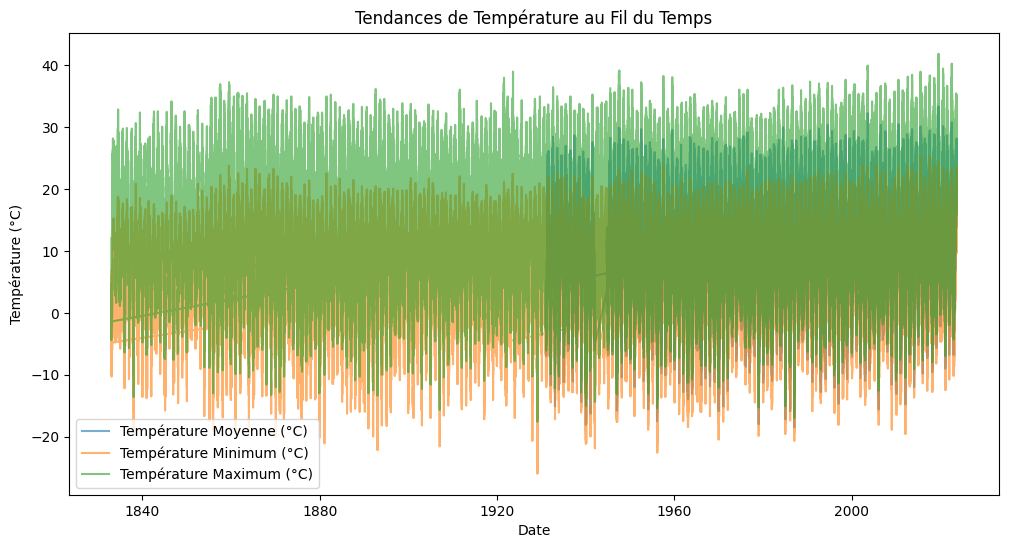

In [20]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

 

# Chargement des données 

cities_df = pd.read_csv('cities.csv') 

countries_df = pd.read_csv('countries.csv') 

weather_df = pd.read_csv('daily-weather-cities.csv') 

 

# Conversion de 'station_id' en chaîne pour faciliter la fusion 

weather_df['station_id'] = weather_df['station_id'].astype(str) 

cities_df['station_id'] = cities_df['station_id'].astype(str) 

 

# Fusion des données sur les identifiants communs 

cities_countries_df = pd.merge(cities_df, countries_df, on=['country', 'iso2'], how='left') 

combined_df = pd.merge(weather_df, cities_countries_df, on=['station_id', 'city_name'], how='left') 
print(combined_df)
print(combined_df.columns)

 

# Transformation de la colonne 'date' en format datetime 

combined_df['date'] = pd.to_datetime(combined_df['date']) 

 

# 1. Tendances de température au fil du temps 

plt.figure(figsize=(12, 6)) 

plt.plot(combined_df['date'], combined_df['avg_temp_c'], label='Température Moyenne (°C)', alpha=0.6) 

plt.plot(combined_df['date'], combined_df['min_temp_c'], label='Température Minimum (°C)', alpha=0.6) 

plt.plot(combined_df['date'], combined_df['max_temp_c'], label='Température Maximum (°C)', alpha=0.6) 

 

plt.xlabel('Date') 

plt.ylabel('Température (°C)') 

plt.title('Tendances de Température au Fil du Temps') 

plt.legend() 

plt.show() 

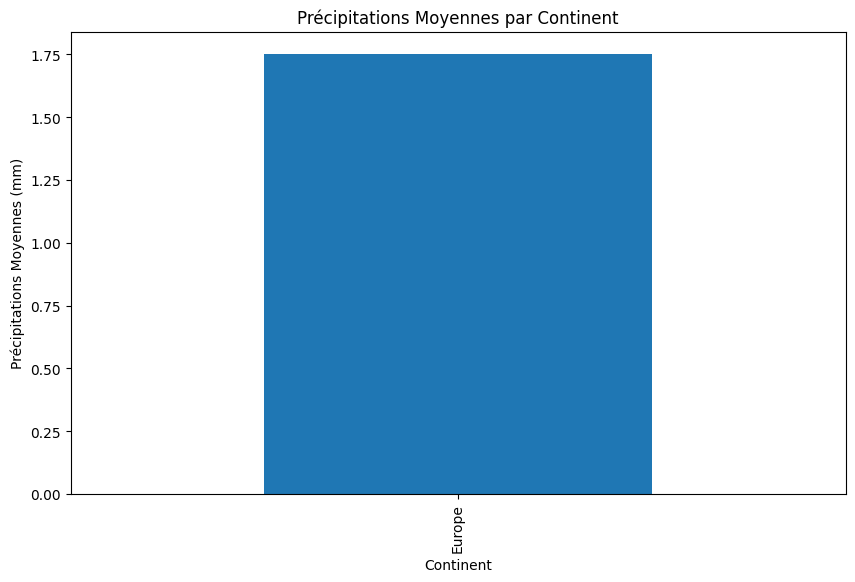

In [2]:
 

# 2. Précipitations moyennes par continent 

precipitation_by_continent = combined_df.groupby('continent')['precipitation_mm'].mean().dropna() 

 

plt.figure(figsize=(10, 6)) 

precipitation_by_continent.plot(kind='bar') 

plt.xlabel('Continent') 

plt.ylabel('Précipitations Moyennes (mm)') 

plt.title('Précipitations Moyennes par Continent') 

plt.show() 

 

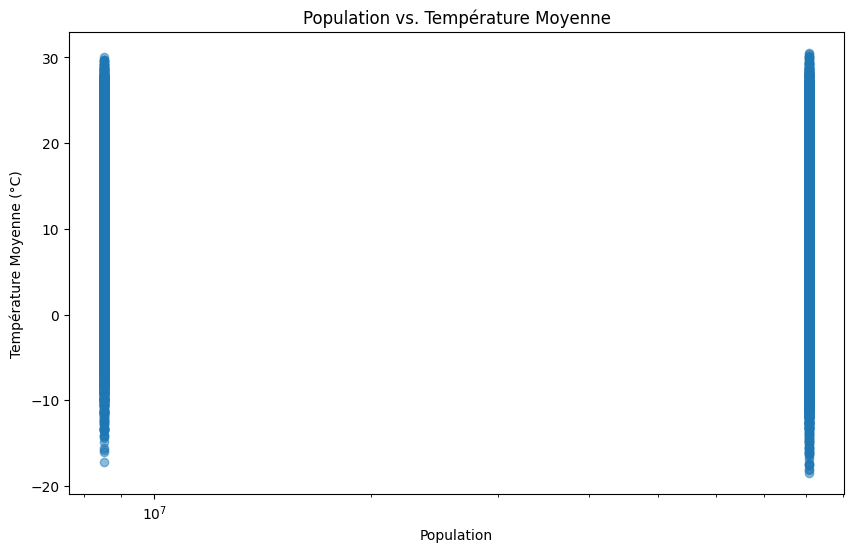

In [21]:
# 3. Relation entre la population et la température moyenne 

population_weather = combined_df[['population', 'avg_temp_c']].dropna() 

 

plt.figure(figsize=(10, 6)) 

plt.scatter(population_weather['population'], population_weather['avg_temp_c'], alpha=0.5) 

plt.xscale('log')  # Utilisation d'une échelle logarithmique pour la population 

plt.xlabel('Population') 

plt.ylabel('Température Moyenne (°C)') 

plt.title('Population vs. Température Moyenne') 

plt.show()


 

In [4]:
# Fusion des données pour obtenir les informations pays et météo 

cities_countries_df = pd.merge(cities_df, countries_df, on=['country', 'iso2'], how='left') 

combined_df = pd.merge(weather_df, cities_countries_df, on=['station_id', 'city_name'], how='left') 

 

# Suppression des valeurs manquantes pour 'precipitation_mm', 'country' et 'season' 

combined_df = combined_df[['country', 'season', 'precipitation_mm']].dropna() 

 

# Calcul des précipitations minimales et maximales par pays et par saison 

precipitation_stats = combined_df.groupby(['country', 'season'])['precipitation_mm'].agg(['min', 'max']).reset_index() 

 

# Affichage des résultats 

print(precipitation_stats) 

   country  season  min    max
0  Austria  Autumn  0.0   85.3
1  Austria  Spring  0.0   92.8
2  Austria  Summer  0.0   80.8
3  Austria  Winter  0.0   61.9
4  Germany  Autumn  0.0   48.0
5  Germany  Spring  0.0   41.4
6  Germany  Summer  0.0  119.5
7  Germany  Winter  0.0   93.0


      country  year  season  avg_temp_c  precipitation_mm
0     Austria  1855  Autumn         NaN               NaN
1     Austria  1855  Spring         NaN               NaN
2     Austria  1855  Summer         NaN               NaN
3     Austria  1855  Winter         NaN               NaN
4     Austria  1856  Autumn         NaN               NaN
...       ...   ...     ...         ...               ...
1027  Germany  2022  Winter    3.674444          1.494444
1028  Germany  2023  Autumn   17.600000               NaN
1029  Germany  2023  Spring    9.667391          1.433696
1030  Germany  2023  Summer   19.957609          2.790909
1031  Germany  2023  Winter    4.166102          1.840678

[1032 rows x 5 columns]


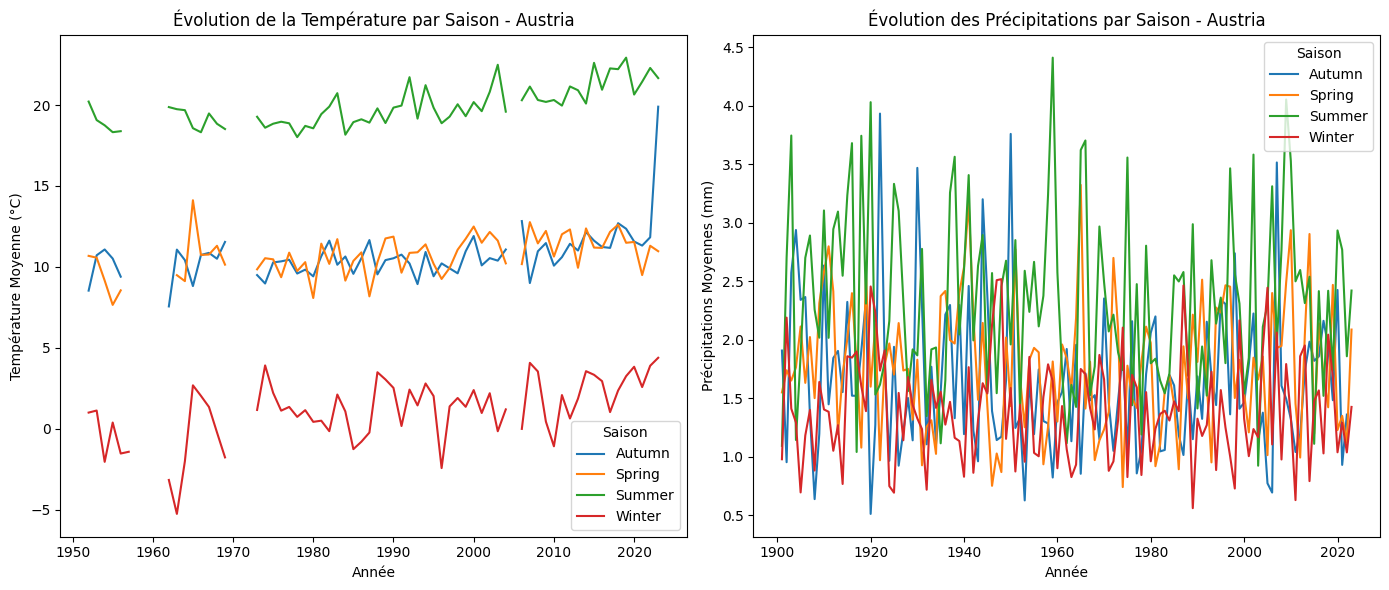

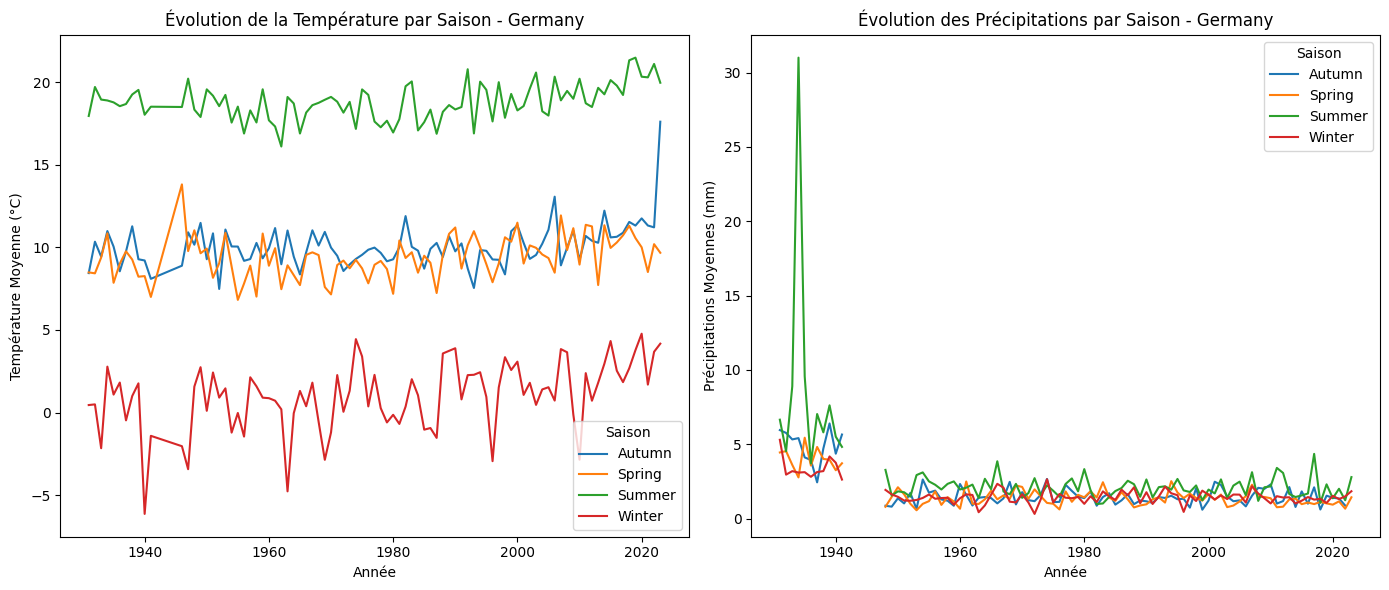

In [22]:
# Transformation de la colonne 'date' en format datetime et ajout de l'année 

combined_df['date'] = pd.to_datetime(combined_df['date']) 

combined_df['year'] = combined_df['date'].dt.year 

 

# Calcul des moyennes de température et précipitations par pays, année, et saison 

seasonal_stats = combined_df.groupby(['country', 'year', 'season']).agg({ 

    'avg_temp_c': 'mean', 

    'precipitation_mm': 'mean' 

}).reset_index() 

print(seasonal_stats)

# Liste des pays pour lesquels créer les graphiques 

countries = seasonal_stats['country'].unique() 

 

# Tracé des tendances de température et de précipitations par pays 

for country in countries: 

    country_data = seasonal_stats[seasonal_stats['country'] == country] 

     

    plt.figure(figsize=(14, 6)) 

     

    # Sous-graphique pour la température 

    plt.subplot(1, 2, 1) 

    for season in country_data['season'].unique(): 

        season_data = country_data[country_data['season'] == season] 

        plt.plot(season_data['year'], season_data['avg_temp_c'], label=season) 

    plt.xlabel('Année') 

    plt.ylabel('Température Moyenne (°C)') 

    plt.title(f'Évolution de la Température par Saison - {country}') 

    plt.legend(title='Saison') 

     

    # Sous-graphique pour les précipitations 

    plt.subplot(1, 2, 2) 

    for season in country_data['season'].unique(): 

        season_data = country_data[country_data['season'] == season] 

        plt.plot(season_data['year'], season_data['precipitation_mm'], label=season) 

    plt.xlabel('Année') 

    plt.ylabel('Précipitations Moyennes (mm)') 

    plt.title(f'Évolution des Précipitations par Saison - {country}') 

    plt.legend(title='Saison') 

    plt.tight_layout() 

    plt.show()
 
 

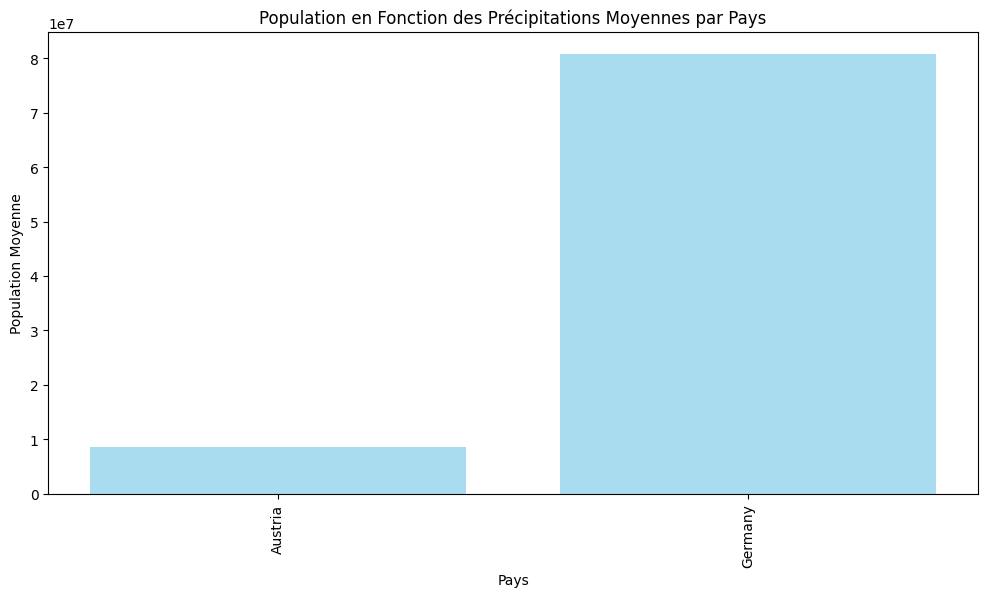

In [23]:
# Suppression des valeurs manquantes pour 'precipitation_mm', 'avg_temp_c', et 'population' 

combined_df = combined_df[['country', 'population', 'precipitation_mm', 'avg_temp_c']].dropna() 

 

# Calcul des moyennes de température et précipitations par pays 

country_stats = combined_df.groupby('country').agg({ 

    'population': 'mean',  # Moyenne de la population pour chaque pays 

    'precipitation_mm': 'mean',  # Moyenne des précipitations pour chaque pays 

    'avg_temp_c': 'mean'  # Moyenne de la température pour chaque pays 

}).reset_index() 

 

# Histogramme : Population en fonction des précipitations 

plt.figure(figsize=(12, 6)) 

plt.bar(country_stats['country'], country_stats['population'],  

        color='skyblue', alpha=0.7, label='Population') 

plt.xlabel('Pays') 

plt.ylabel('Population Moyenne') 

plt.title('Population en Fonction des Précipitations Moyennes par Pays') 

plt.xticks(rotation=90) 

plt.show() 

 

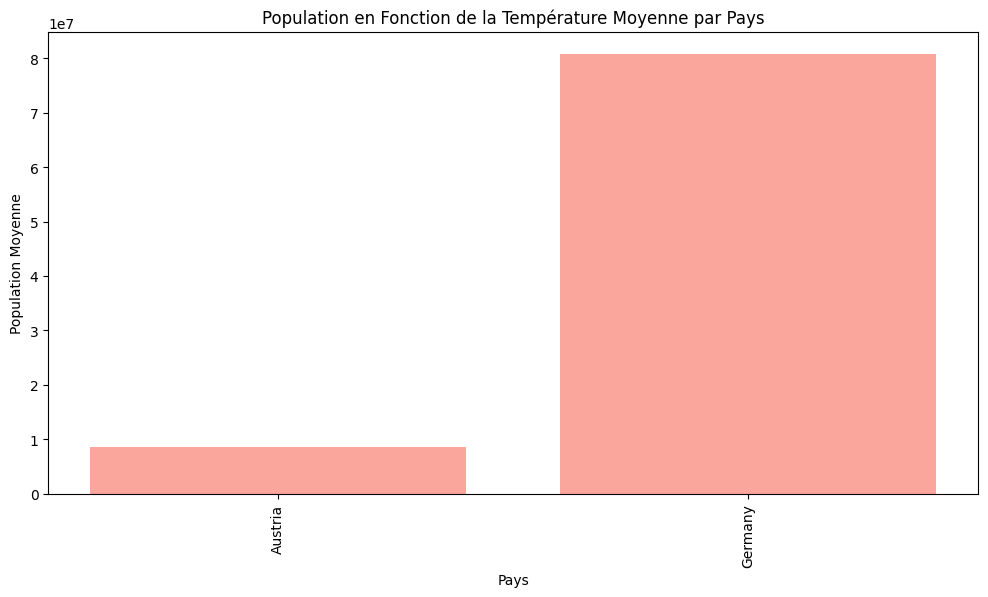

In [24]:
# Histogramme : Population en fonction de la température 

plt.figure(figsize=(12, 6)) 

plt.bar(country_stats['country'], country_stats['population'],  

        color='salmon', alpha=0.7, label='Population') 

plt.xlabel('Pays') 

plt.ylabel('Population Moyenne') 

plt.title('Population en Fonction de la Température Moyenne par Pays') 

plt.xticks(rotation=90) 

plt.show() 